In [3]:
# # !IMPORTANT - to run this notebook download first Houses.csv dataset from https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland and put it in data/ folder
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# import csv into pandas DataFrame
houses = pd.read_csv('data/Houses.csv',encoding = "ISO-8859-1")
houses = houses.sample(frac = 1)
houses.head(50)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
20065,20065,Grzegórzki Olsza m³yñska,Kraków,0.0,21989.0,50.083364,19.970568,589000.0,3.0,70.00,1975.0
22315,22315,Bronowice Katowicka Bronowice ok. Wizjonerów,Kraków,1.0,28479.0,50.084921,19.890948,380000.0,2.0,39.70,2020.0
1175,1175,Stare Miasto Kazimierz pl. Wolnica,Kraków,2.0,20484.0,50.048437,19.944251,799000.0,3.0,65.00,1910.0
23347,23347,Stare Miasto Centrum ul. Garbary Szyperska Cen...,Poznañ,2.0,1257.0,52.400663,16.919733,543071.0,3.0,60.44,2020.0
14129,14129,Praga-Po³udnie Goc³aw,Warszawa,4.0,9964.0,52.228633,21.106572,612000.0,3.0,59.32,2022.0
11765,11765,Podgórze,Kraków,2.0,20642.0,50.043100,19.952961,569000.0,3.0,53.98,2021.0
12815,12815,Wola,Warszawa,3.0,10609.0,52.236238,20.954781,822375.0,2.0,38.25,2018.0
19238,19238,Podgórze,Kraków,0.0,23565.0,50.043100,19.952961,335000.0,2.0,35.41,2020.0
9796,9796,Stare Miasto Pi¹tkowo os. Boles³awa mia³ego,Poznañ,4.0,2465.0,52.400663,16.919733,465000.0,4.0,70.00,1992.0
1494,1494,Podgórze Duchackie Kurdwanów,Kraków,3.0,23755.0,50.008476,19.959153,500000.0,3.0,62.00,1983.0


In [4]:
# analyze statistic data
print(houses.describe())
print(houses.info())
print(houses.isnull().values.any())

houses

         Unnamed: 0         floor            id      latitude     longitude  \
count  23764.000000  23764.000000  23764.000000  23764.000000  23764.000000   
mean   11881.500000      2.808744  15621.964484     51.374874     19.861773   
std     6860.220235      2.463467   8617.293898      1.099836      1.447186   
min        0.000000      0.000000      1.000000     49.933056      4.204796   
25%     5940.750000      1.000000   8420.750000     50.066489     19.916563   
50%    11881.500000      2.000000  15637.500000     52.193987     19.999330   
75%    17822.250000      4.000000  23111.250000     52.267594     20.996180   
max    23763.000000     10.000000  30308.000000     54.435238     30.319403   

              price         rooms            sq         year  
count  2.376400e+04  23764.000000  2.376400e+04  23764.00000  
mean   6.493536e+05      2.620771  1.027249e+02   2000.55117  
std    5.326970e+05      0.996530  6.533688e+03     48.31402  
min    5.000000e+03      1.000000  8

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
20065,20065,Grzegórzki Olsza m³yñska,Kraków,0.0,21989.0,50.083364,19.970568,589000.0,3.0,70.00,1975.0
22315,22315,Bronowice Katowicka Bronowice ok. Wizjonerów,Kraków,1.0,28479.0,50.084921,19.890948,380000.0,2.0,39.70,2020.0
1175,1175,Stare Miasto Kazimierz pl. Wolnica,Kraków,2.0,20484.0,50.048437,19.944251,799000.0,3.0,65.00,1910.0
23347,23347,Stare Miasto Centrum ul. Garbary Szyperska Cen...,Poznañ,2.0,1257.0,52.400663,16.919733,543071.0,3.0,60.44,2020.0
14129,14129,Praga-Po³udnie Goc³aw,Warszawa,4.0,9964.0,52.228633,21.106572,612000.0,3.0,59.32,2022.0
...,...,...,...,...,...,...,...,...,...,...,...
389,389,Weso³a Stara Mi³osna,Warszawa,0.0,10274.0,52.224792,21.225174,432000.0,2.0,38.00,2018.0
1611,1611,Bronowice Radzikowskiego,Kraków,2.0,29129.0,50.089419,19.883663,990000.0,4.0,106.00,2004.0
20192,20192,Pr¹dnik Bia³y,Kraków,4.0,29708.0,50.103568,19.953603,455000.0,3.0,51.01,2019.0
22127,22127,Grzegórzki ul. Grzegórzecka,Kraków,4.0,28677.0,50.058788,19.950060,468720.0,1.0,33.48,2020.0


<Axes: >

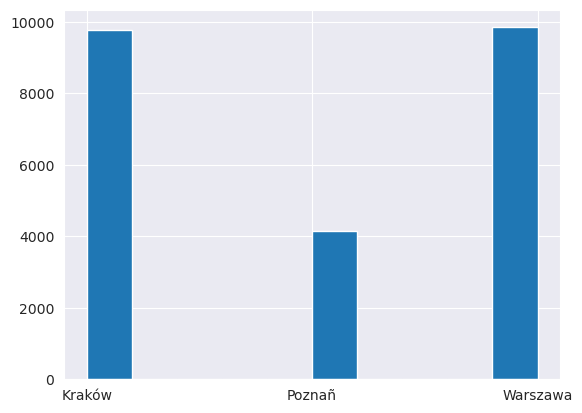

In [5]:
# cities distribution
houses['city'].hist() 

In [6]:
#Use one hot encoding to transform categorical values into boolean columns
cities = pd.get_dummies(houses['city'])
houses = pd.merge(
    left=houses,
    right=cities,
    left_index=True,
    right_index=True,
)
print(houses.head())

       Unnamed: 0                                            address  \
20065       20065                           Grzegórzki Olsza m³yñska   
22315       22315     Bronowice Katowicka  Bronowice  ok. Wizjonerów   
1175         1175                 Stare Miasto Kazimierz pl. Wolnica   
23347       23347  Stare Miasto Centrum ul. Garbary Szyperska Cen...   
14129       14129                              Praga-Po³udnie Goc³aw   

           city  floor       id   latitude  longitude     price  rooms     sq  \
20065    Kraków    0.0  21989.0  50.083364  19.970568  589000.0    3.0  70.00   
22315    Kraków    1.0  28479.0  50.084921  19.890948  380000.0    2.0  39.70   
1175     Kraków    2.0  20484.0  50.048437  19.944251  799000.0    3.0  65.00   
23347    Poznañ    2.0   1257.0  52.400663  16.919733  543071.0    3.0  60.44   
14129  Warszawa    4.0   9964.0  52.228633  21.106572  612000.0    3.0  59.32   

         year  Kraków  Poznañ  Warszawa  
20065  1975.0       1       0         

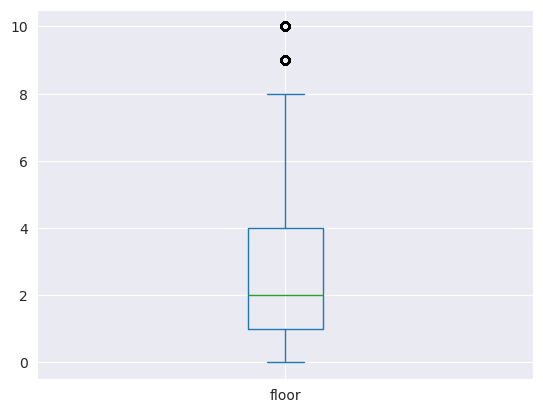

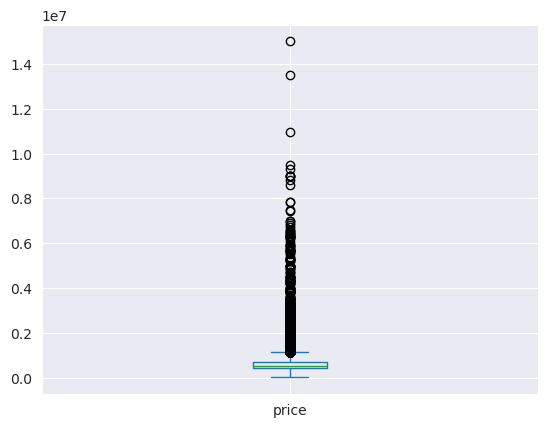

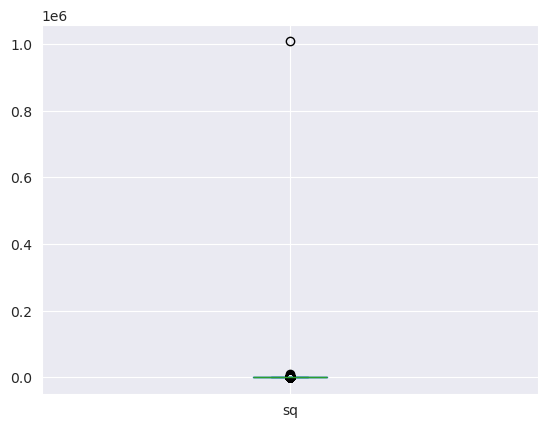

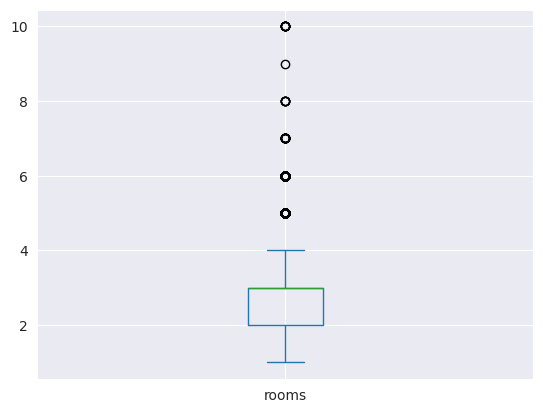

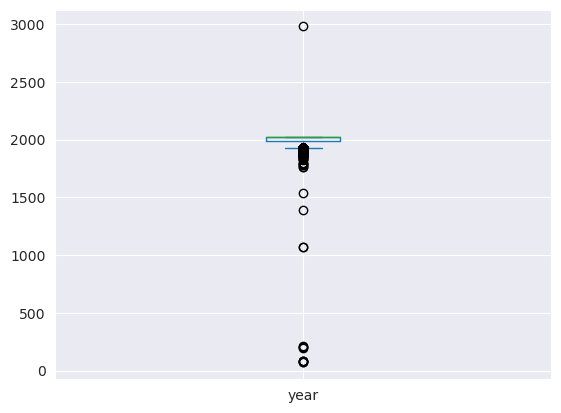

In [7]:
# data distribution on box plots
houses['floor'].plot(kind='box')
plt.show()
houses['price'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box') 
plt.show()
houses['rooms'].plot(kind='box') 
plt.show()
houses['year'].plot(kind='box')
plt.show()

In [8]:
# Removed not needed columns
del houses['address']
del houses['id']
del houses['Unnamed: 0']
del houses['city']
houses.head()

,floor,latitude,longitude,price,rooms,sq,year,Kraków,Poznañ,Warszawa
20065,0.0,50.083364,19.970568,589000.0,3.0,70.00,1975.0,1,0,0
22315,1.0,50.084921,19.890948,380000.0,2.0,39.70,2020.0,1,0,0
1175,2.0,50.048437,19.944251,799000.0,3.0,65.00,1910.0,1,0,0
23347,2.0,52.400663,16.919733,543071.0,3.0,60.44,2020.0,0,1,0
14129,4.0,52.228633,21.106572,612000.0,3.0,59.32,2022.0,0,0,1


In [9]:
#Remove outliers
houses = houses.drop(houses[houses.year < 1800].index)
houses = houses.drop(houses[houses.year > 2022].index)
houses = houses.drop(houses[houses.sq > 500].index)

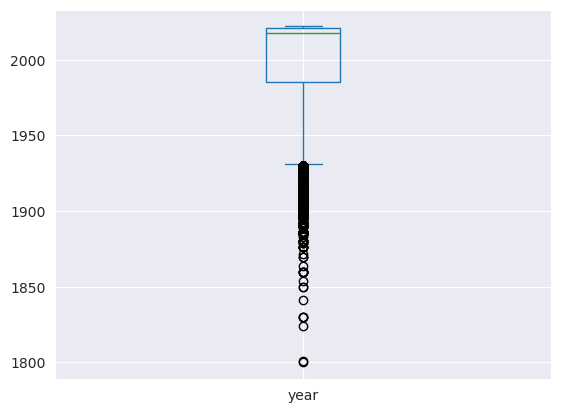

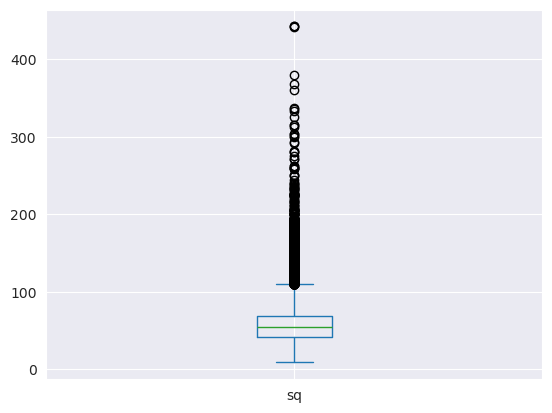

In [10]:
houses['year'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box')
plt.show()

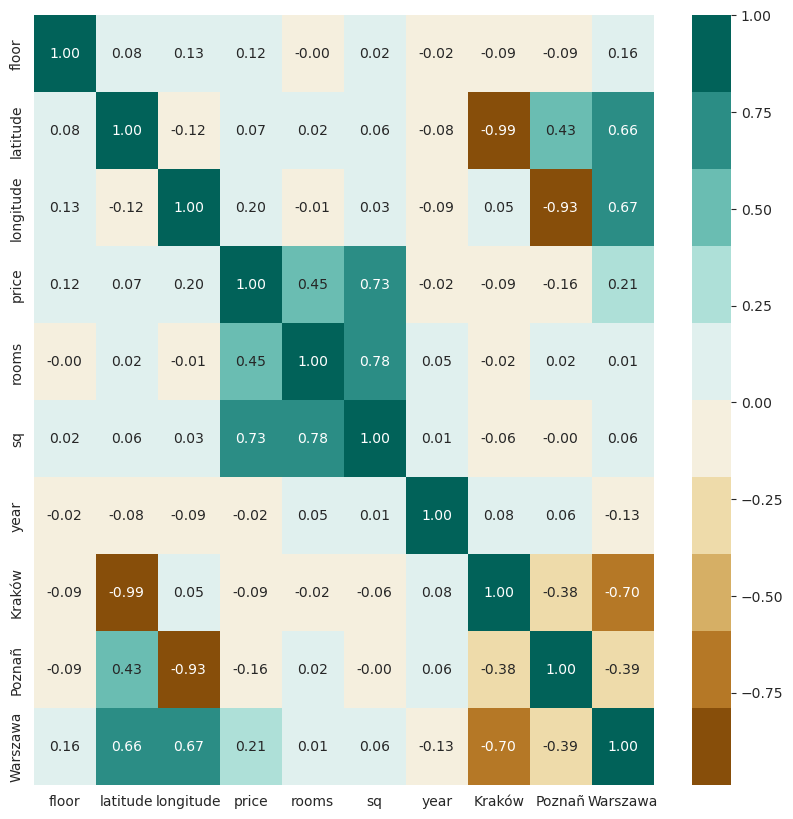

In [11]:
# Display correlation matrix

correlations = houses.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [12]:
# Prepare training set (all data without labels)
X = houses.drop('price', axis=1).to_numpy()
X

array([[ 0.        , 50.0833641 , 19.9705682 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , 50.0849209 , 19.8909484 , ...,  1.        ,
         0.        ,  0.        ],
       [ 2.        , 50.0484367 , 19.9442508 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 4.        , 50.1035684 , 19.95360311, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.        , 50.0587885 , 19.9500605 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , 52.3357707 , 16.8261046 , ...,  0.        ,
         1.        ,  0.        ]])

In [13]:
# Prepare labels for training set
y = houses.loc[:, 'price'].to_numpy()
y

array([589000., 380000., 799000., ..., 455000., 468720., 634671.])

In [14]:
# Split data to training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [15]:
# Universal method for training and evaluating different models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    with open('titanic_classifier.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # generate predictions
    predictions = classifier.predict(feature_vector_valid)
    
    # evalueate model
    score_vals = [
        metrics.mean_squared_error(predictions, y_test, squared=False),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [16]:
# MODEL 1 - Linear regression
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [366845.6859637721, 161468.35697575327]


/home/michal/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


random forrest tree [240690.8925329773, 72385.66824523133]


/home/michal/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: >

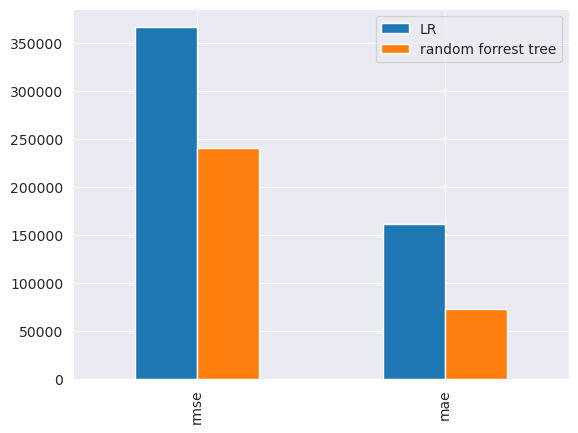

In [17]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['rmse', 'mae'])
df_compare.plot(kind='bar')

In [18]:
# Test manually prediction
regressor.predict([[2.0, 50.049224, 19.970379, 3.0, 74.05, 2021.0, 1, 0, 0]]) #prawidłowa wartość 749000.0

array([749000.])

In [19]:
# Correction - try adjust model hyperparameters

# MODEL 3 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

random forrest tree [241181.9276526807, 72030.72138852399]


/home/michal/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
